# TP2 : Extraction d'information

## Imports

In [1]:
# Keywords
import os
import yake

# Word Cloud
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

# NER
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences
nlp = spacy.load('fr_core_news_md')

# Sentiment Analysis
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\glmqu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Fichiers\Documents\Université\M2-STIC\STIC-B545\tac\tac_venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Création d'un fichier avec tous les journaux de l'année 1912

In [2]:
year = 1912

# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]

# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

In [3]:
# On peut compter le nombre d'éléments (= fichiers) dans la liste -> c'est (presque) toujours 100, ça permet donc de vérifier s'il n'y a pas eu de problème dans l'exécution du code
print(len(content_list))

100


In [4]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [5]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding="utf-8") as f:
    file_year = f.read()

file_year[:500]

'Au Mollir* " iu théâtre Jioliàre ihnit an «*»&• m* ***• «Ment *vëc Trois Amoixreuset, la brûlante gwiqua 4e Lehar, que le puJAlo ne en teæe. M3 d\'applaudir- Aussi oe ne eotfl chaque soir «h bis et rappels. La Valse des Roses, qui est maintenant pcqwiiaire, à BruxeUee, <#t rew* mandée à «ha<pjw arepresentatioa. Uni fédération dee artletee wallons Depuis longtemps déjà, U était question, d\'une fédération des artistes wallons. Plu- lé OU» tCUUlUMV** >*VB w* *»“"■¥ • , îgieurs peintres, sculpteurs, '

## Extraction de mots clés avec Yake

In [6]:
# Instantier l'extracteur de mots clés en fr + les 50 premiers
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

# Récupérer le texte du temporaire de l'année étudiée, en mode lecture ('r'), en encodage utf-8
text = open(os.path.join(temp_path, f"{year}.txt"), 'r', encoding="utf-8").read()

In [7]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('Agence Rossel', 3.93304808601784e-06),
 ('rue', 5.55573436440088e-06),
 ('rue Van', 1.2135191280747819e-05),
 ('Grand prix Bruxelles', 1.32999918133322e-05),
 ('Bruxelles', 1.4451259275185564e-05),
 ('plus haut prix', 1.6676465979451786e-05),
 ('rue Royale BRUXELLES', 2.487325484254843e-05),
 ('prix Rue Van', 2.5376534438571044e-05),
 ('rue Van Artevelde', 2.5645780485178222e-05),
 ('RUE NEUVE', 2.8697366355804193e-05),
 ('rue Royale', 2.930225159736347e-05),
 ('RUE NEUVE BRUXELLES', 3.0232884393893457e-05),
 ('Belle maison', 3.1359739031527004e-05),
 ('plus', 3.233431495211376e-05),
 ('Maison', 3.3657079705174894e-05),
 ('Rossel', 3.910998372428771e-05),
 ('BRUXELLES Belle maison', 4.091915802062335e-05),
 ('prix', 4.1672675012698986e-05),
 ('dem', 4.2927688145428137e-05),
 ('louer belle maison', 4.4043764455348746e-05),
 ('BRUXELLES demande bon', 4.98783016692438e-05),
 ('rentier rue Van', 5.6609289979925935e-05),
 ('RENTIER rue Léopold', 5.698107280603323e-05),
 ('Rue Berckmans B

In [8]:
# Ne garder que les bigrammes / trigrammes et plus
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
    # if len(words) == 3:
    # if len(words) > 3 :
        kept.append(kw)
kept

['Agence Rossel',
 'rue Van',
 'RUE NEUVE',
 'rue Royale',
 'Belle maison',
 'Bonne maison',
 'rue Joseph',
 'Jeune fille',
 'Notaire Van',
 'plus grand',
 'prix Bruxelles',
 'Grand prix']

## Nuage de mots

In [9]:
# Stopwords
sw = stopwords.words("french")
sw += [
    # Coquilles OCR pas enlevées par fonction de nettoyage
    "dem", "serv", "chaus", "aujourd", "sach", "jard","brux","aven", "occas", "pens", "repr", "prés", "chamb", "culs",
    # Mots (quasiment) vides de sens
    "les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous", "celle", "entre", "encore", "toutes", "toute", "pendant", "moins", "dire", "voir", "cela", "non", "faut", "trois", "quatre", "cinq", "quart", "demi", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres", "van", "het", "autre", "jusqu", "très", "trop", "chez", "près", "toutes", "leurs", "avant", "suite", "rien", "quelques", "puis", "alors", "quand", "ceux", "elles", "déjà", "celui", "devant", "toujours", "outre", "tant", "mieux", "assez", "beaucoup", "plusieurs", "quelque", "quelques", "vers",
    # Mots pas pertinents dans le contexte du journal
    "rossel", "agence", "nord", "midi", "royale", "ville", "avenue", "place", "boulevard", "chaussée", "saint", "octobre", "mardi", "août", "dimanche", "septembre", "lundi", "décembre", "janvier", "juin", "avril", "mercredi", "samedi", "novembre", "jeudi", "vendredi"]
sw = set(sw)

# Fonction de nettoyage

def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 3 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [10]:
# Appliquer la fonction et vérifier les résultats

clean_text(year, folder=temp_path)

with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding="utf-8") as f:
    after = f.read()

# print(after[:500], "\n---")

# Calculer les mots les plus fréquents et afficher les résultats

frequencies = Counter(after.split())

print(frequencies.most_common(200))

[('bruxelles', 1187), ('prix', 1004), ('maison', 964), ('louer', 647), ('heures', 592), ('demande', 481), ('grand', 480), ('vend', 478), ('fille', 465), ('mois', 422), ('vendre', 409), ('notaire', 385), ('francs', 377), ('bonne', 338), ('soir', 328), ('jour', 318), ('jours', 318), ('belle', 310), ('anvers', 289), ('contenant', 287), ('vente', 286), ('cour', 285), ('grande', 272), ('commerce', 271), ('matin', 269), ('jeune', 263), ('salle', 262), ('état', 255), ('part', 253), ('neuf', 250), ('paris', 250), ('temps', 250), ('bureau', 249), ('belgique', 237), ('porte', 235), ('femme', 225), ('lieu', 223), ('marché', 223), ('société', 220), ('homme', 218), ('hier', 216), ('cours', 215), ('rentier', 215), ('petit', 214), ('beau', 210), ('chambre', 209), ('ecrire', 209), ('partie', 207), ('occasion', 205), ('général', 203), ('jardin', 203), ('cent', 202), ('seul', 202), ('piano', 201), ('bons', 199), ('petite', 197), ('fort', 195), ('centre', 193), ('gare', 190), ('adresser', 186), ('neuve',

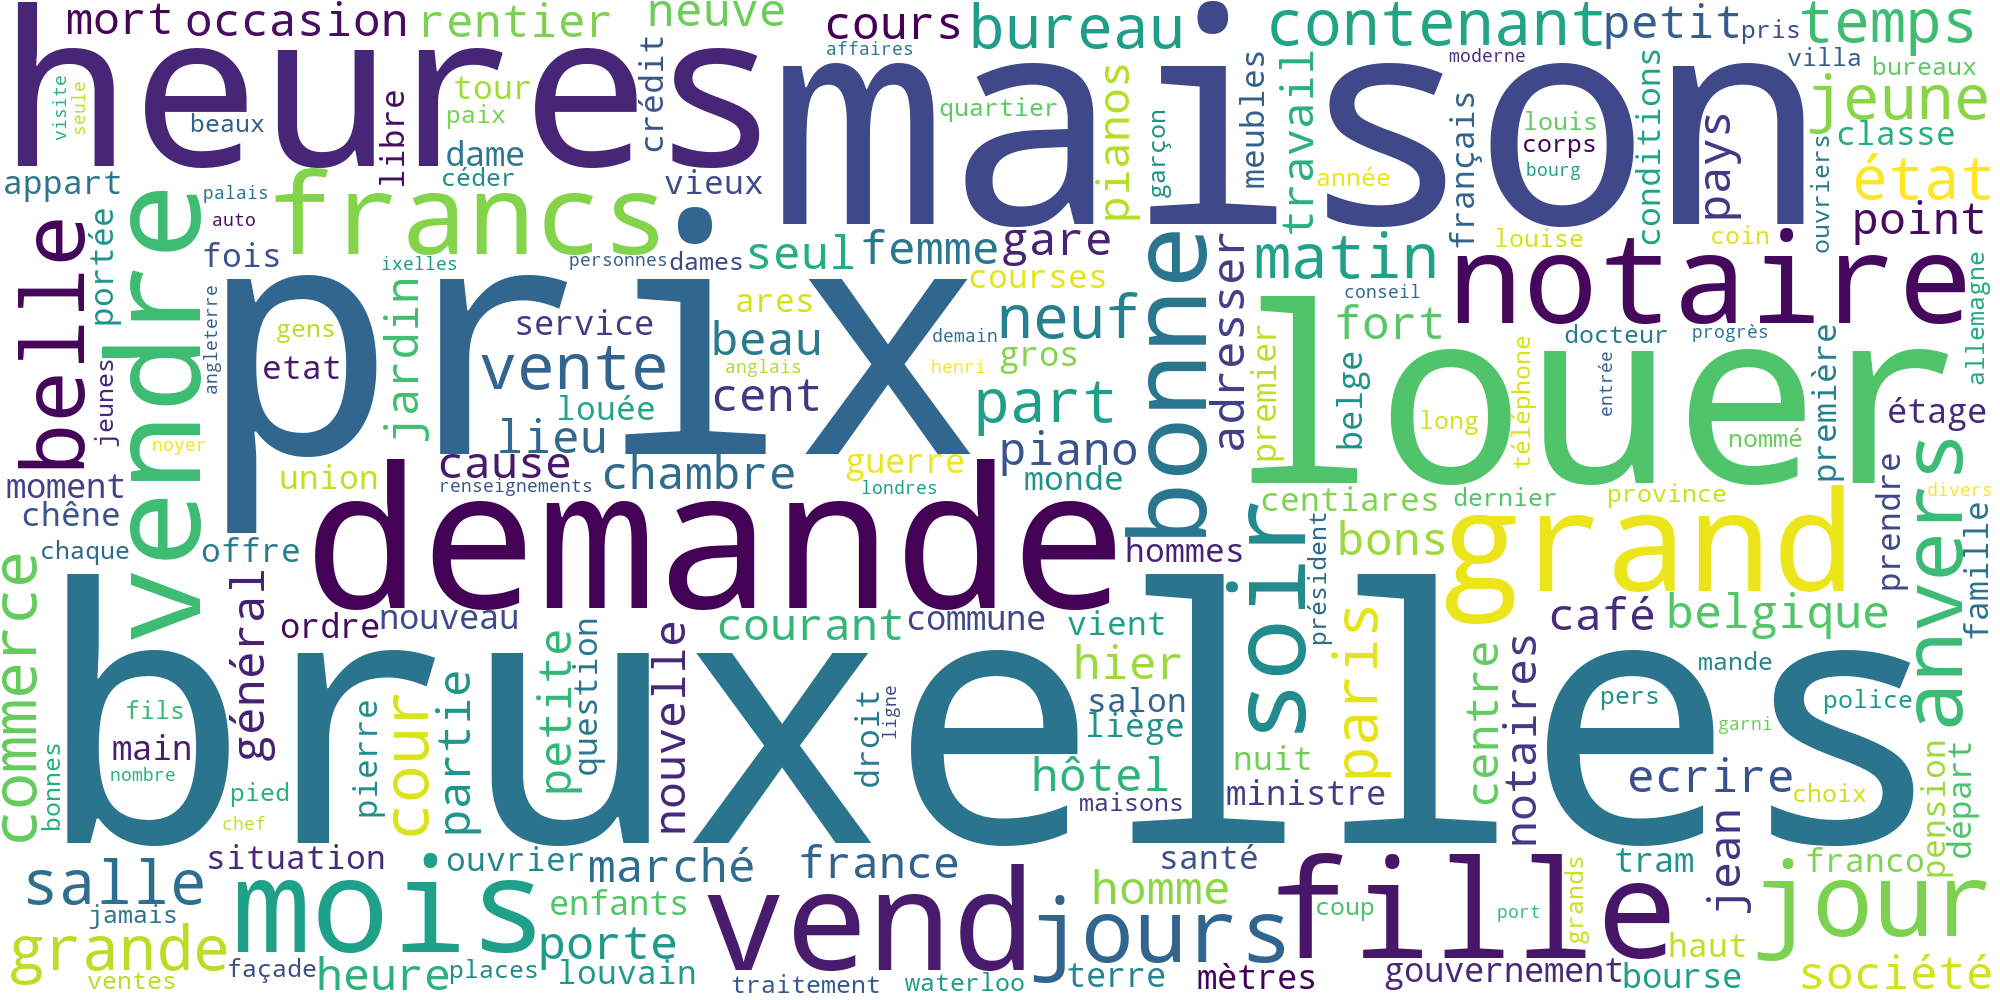

In [11]:
# Créer, stocker, afficher le nuage de mots

cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Reconnaissance d'entités nommées avec SpaCy

In [12]:
# Charger le texte
n=100000
text_NER = open(os.path.join(temp_path, f"{year}.txt"), 'r', encoding="utf-8").read()[:n]

# Traiter le texte

doc = nlp(text_NER)

# Compter les entités (personnes, lieux, organisations)

people = defaultdict(int)
places = defaultdict(int)
orga = defaultdict(int)

for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1
    elif ent.label_ == "LOC" and len(ent.text) > 3:
        places[ent.text] += 1
    elif ent.label_ == "ORG" and len(ent.text) > 3:
        orga[ent.text] += 1

# Trier

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)
sorted_places = sorted(places.items(), key=lambda kv: kv[1], reverse=True)
sorted_orga = sorted(orga.items(), key=lambda kv: kv[1], reverse=True)

In [13]:
# Imprimer les 50 premières personnes

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Agence Rossel apparait 11 fois dans le corpus
Sun Yat Sen apparait 6 fois dans le corpus
M. Cambon apparait 3 fois dans le corpus
M. Caillaux apparait 3 fois dans le corpus
Saïd apparait 3 fois dans le corpus
Gripekoven apparait 3 fois dans le corpus
M. Méline apparait 2 fois dans le corpus
Ribot apparait 2 fois dans le corpus
Sultan apparait 2 fois dans le corpus
s. enf apparait 2 fois dans le corpus
Emballage apparait 2 fois dans le corpus
P iano apparait 2 fois dans le corpus
dee artletee wallons apparait 1 fois dans le corpus
A. Bonnetam apparait 1 fois dans le corpus
•Mare-Henri Meunier apparait 1 fois dans le corpus
Paul Sterpin apparait 1 fois dans le corpus
Emile iMôtte apparait 1 fois dans le corpus
Paul Dubois apparait 1 fois dans le corpus
Florent Meuet apparait 1 fois dans le corpus
Louise Danse apparait 1 fois dans le corpus
Marie Destrée-Dansc apparait 1 fois dans le corpus
Jean Herain apparait 1 fois dans le corpus
Henriette apparait 1 fois dans le corpus
Jules Cran appa

In [14]:
# Imprimer les 50 premiers lieux

for place, freq in sorted_places[:50]:
    print(f"{place} apparait {freq} fois dans le corpus")

Bruxelles apparait 22 fois dans le corpus
état apparait 9 fois dans le corpus
Allemagne apparait 8 fois dans le corpus
Paris apparait 6 fois dans le corpus
Brux apparait 5 fois dans le corpus
Etat apparait 4 fois dans le corpus
France apparait 4 fois dans le corpus
Berlin apparait 4 fois dans le corpus
Constantinople apparait 4 fois dans le corpus
Chine apparait 4 fois dans le corpus
Chinois apparait 4 fois dans le corpus
la France apparait 4 fois dans le corpus
Anvers apparait 4 fois dans le corpus
Nord apparait 4 fois dans le corpus
Jette apparait 3 fois dans le corpus
Laeken apparait 3 fois dans le corpus
Ixelles apparait 3 fois dans le corpus
Europe apparait 3 fois dans le corpus
de France apparait 3 fois dans le corpus
Angleterre apparait 3 fois dans le corpus
Louvain apparait 3 fois dans le corpus
Egypte apparait 3 fois dans le corpus
BRUXELLES apparait 3 fois dans le corpus
Borinage apparait 2 fois dans le corpus
Hainaut apparait 2 fois dans le corpus
Hongrie apparait 2 fois dan

In [15]:
# Imprimer les 50 premières organisations

for orga, freq in sorted_orga[:50]:
    print(f"{orga} apparait {freq} fois dans le corpus")

Bru- apparait 4 fois dans le corpus
Constitution apparait 3 fois dans le corpus
Chambre apparait 2 fois dans le corpus
Sénat apparait 2 fois dans le corpus
ORCHESTRIONS apparait 2 fois dans le corpus
BruxeUee apparait 1 fois dans le corpus
Fédération apparait 1 fois dans le corpus
Ettor- apparait 1 fois dans le corpus
Institut Hachez apparait 1 fois dans le corpus
deg syndicats-de la Fédération des mineurs du apparait 1 fois dans le corpus
Temonté apparait 1 fois dans le corpus
La poste apparait 1 fois dans le corpus
Nouvel An t Comme la vieille apparait 1 fois dans le corpus
Printemps apparait 1 fois dans le corpus
sara apparait 1 fois dans le corpus
ROYAUME Hommes apparait 1 fois dans le corpus
Incarnation apparait 1 fois dans le corpus
Université de Cologne apparait 1 fois dans le corpus
Université apparait 1 fois dans le corpus
Agence Rosse] apparait 1 fois dans le corpus
ALLEMAGNE &e budget prussien Berlin apparait 1 fois dans le corpus
Gazette de l'Allemagne du Nord apparait 1 fo

## Sentiment analysis avec Textblob-FR

In [16]:
# Fonction

tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [17]:
# Exécuter la fonction sur des phrases choisies manuellement

get_sentiment("Trois d’entre elles purent être assez rapidement dégagées; quant au jeune Taelemans il fut tiré de sa situation critique sans connaissance.")
get_sentiment("Les champs sont sous eau, et tes fermiers repêchent ce qu’ils peuvent sauver du désastre.")
get_sentiment("La Fédération des jeunes-gardes libérales organise un congrès extraordinaire qui aura lieu le 24 novembre prochain, en vue de discuter la question de la révision.")
get_sentiment("Les coups de revolver et de couteau devaient faire une troisième victime.")
get_sentiment("Le Roi est en grande tenue de lieutenant- général, la Reine porte une merveilleuse toilette recouverte de véritable dentelle, ainsi que le manteau do dentelle qui lui fut offert par les •dames belges Jars de son mariage, et représentant les écuesons des neuf provlnces.")
get_sentiment("Voyant ses maigres ressources- épuisées, cl redoutant pardessus tout de retourner A lu colonie, le malheureux s’est suicidé hier soir en se pendant A la poignée de sa porte On n trouvé sur sa table un billet dans lequel U exposait, en quelques mots, les motifs do sa funeste détermination.")
get_sentiment("La presse allemande La limette de Yoss, ce matin, célèbre l'héroïsme du capitaine du Titanic, et considère que. 1e récit de sa mort est une belle page d’enseignement à lire aux enfants.")
get_sentiment("Si vous avez une gastrite, une dyspepsie, une gastralgie, une dilatation, une entérite, des indigestions,des vomissements; si après le repas vous avez des renvois, des lourdeurs, des aigreurs, des gonflements, des sur- focations.despalpitations, des maux de tête, de la somnolence; si vous ôtes devenu triste, mélancolique, neurasthénique, prenez les Poudres de Gock.")
get_sentiment("Mais, boudeuse, Lili lui refusait, sa main ' pour se cramponner au bras de Grenoult.")
get_sentiment("Par suite relations insuf. on dés. marier j. fille 22 a , jolie, bon. éducat., enfant unique, mère veuve, dot 150,000 fr.. plus bel. eapér- à M. dlstine- poslt. sfalsle, préfér. industr. Discrétion. Itettr. signées.")

This text is 16% positive and 0.575% subjective.
This text is 50% negative and 0.15% subjective.
This text is 2% positive and 0.23333333333333336% subjective.
This text is neutral and perfectly objective.
This text is 21% positive and 0.2642857142857143% subjective.
This text is 22% negative and 0.22000000000000003% subjective.
This text is 32% positive and 0.43333333333333335% subjective.
This text is 6% negative and 0.5700000000000001% subjective.
This text is neutral and perfectly objective.
This text is 55% positive and 0.58% subjective.
